In [3]:
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import cess_esp
from nltk.tag import UnigramTagger
from nltk.stem import WordNetLemmatizer
import pandas as pd
import string
import re

# Preprocessing Function

In [4]:
# Read the CSV file and create a DataFrame object
df = pd.read_csv("tweets.csv")
df

,tweet_id,text,account,domain,background,label
0,1608959444339298309,@PJSanchezGj @yoen100palabras Pues la verdad e...,@perezreverte,PERSON,ART,ES
1,1608959444339298309,"Vi una serie hace tiempo, cuyo título no recue...",@perezreverte,PERSON,ART,ES
2,1608959444339298309,"), que no estaba mal, pero tampoco me pareció ...",@perezreverte,PERSON,ART,ES
3,1608856377702875136,"@elmenta41567732 Todo llegará, si vivo lo sufi...",@perezreverte,PERSON,ART,ES
4,1608856377702875136,Un afectuoso saludo.,@perezreverte,PERSON,ART,ES
...,...,...,...,...,...,...
29975,1402013771825045509,!,@CA7RIEL_RE_KPO,PERSON,ART,ARG
29976,1402012759043317773,@thecolorated Envidia pura t pasa por andar en...,@CA7RIEL_RE_KPO,PERSON,ART,ARG
29977,1402012553375633408,Antes de ser famoso pa mi cumple me saludaban ...,@CA7RIEL_RE_KPO,PERSON,ART,ARG
29978,1401352320638672914,@luccccccchi @eIorigen CAGAST,@CA7RIEL_RE_KPO,PERSON,ART,ARG


In [6]:
df.sample(15)

,tweet_id,text,account,domain,background,label
8790,1607735573048877059,Repasaremos todo lo que ha sucedido en 2022.,@IbaiLlanos,PERSON,MEDIA,ES
20153,1607820493322690562,💣 La dura crítica de Pergolini a Riquelme tras...,@C5N,ORG,NEW,ARG
28154,1517233322308423680,https://t.co/rIUhkfLoJD,@diegosantilli,PERSON,POL,ARG
4154,1605616927266701315,Partida completa aquí:\n👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻\nhttp...,@gabrielrufian,PERSON,POL,ES
800,1582688268818448388,https://t.co/SOqr3JVjXN,@perezreverte,PERSON,ART,ES
3883,1570010628462616579,Queremos que vuestros proyectos encuentren un ...,@sanchezcastejon,PERSON,POL,ES
26875,1566929055311663104,Vamos a hablar de astrología.,@miguegranados,PERSON,MEDIA,ARG
2370,1533042273201561601,#CambioReal #VOX https://t.co/o9k6UtNh2x,@Santi_ABASCAL,PERSON,POL,ES
12541,1608049396402339842,"Para lograr eliminar la huella de carbón, la U...",@elconfidencial,ORG,NEW,ES
7135,1466326351837896708,https://t.co/mMbqcVQu9v,@PabloCasado_,PERSON,POL,ES


In [9]:
def preprocess_dataframe(df):
    # Preprocess the text for each tweet in the DataFrame
    for i, row in df.iterrows():
        # Lowercase the text
        text = row['text'].lower()

        # Remove punctuation from the text
        import string
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Remove URLs from the text
        #urls = re.findall(r'(?:https?://|www\.)\S+\.\S+', text)

        urls = re.findall(r'\bhttps\w+', text)

        # Tokenize the text into individual words
        words = word_tokenize(text)

        # Remove undesired characters from the list of words
        undesired_chars = ['@', '--', '#', ",", ".", "►", "''", "``","%","-","","/","_", "http","¿","¡","“","”"]
        
        words = [word for word in words if word not in undesired_chars]
        words = [word for word in words if word not in urls]


        # Join the list of words back into a single string
        text = " ".join(words)

        # Replace the original text with the preprocessed text in the output DataFrame
        df.at[i, 'text'] = text

        # Delete rows with empty text
        if not text.strip():
            df = df.drop(i)

    # Return the preprocessed DataFrame
    return df

In [12]:
df = preprocess_dataframe(df)

# Reduction of the entire Dataset for the model

In [7]:
df = df.head(10000)
df

,tweet_id,text,account,domain,background,label
0,1567030790109761537,con carrizosacarlos en elmundoes👇🏻,@InesArrimadas,PERSON,POL,ES
1,1512495492177014789,e un autócrata,@Santi_ABASCAL,PERSON,POL,ES
2,1608951396237180930,cerró el dólar soja ii y atrajo ofertas por us...,@LANACION,ORG,NEW,ARG
3,1562828341773619200,en esquerra intentamos ser útiles asumiendo qu...,@gabrielrufian,PERSON,POL,ES
4,1608431670117519362,enojo en una provincia por la demora en la lle...,@LANACION,ORG,NEW,ARG
...,...,...,...,...,...,...
9995,1578205306336731137,alma pellegrini y su versión de yesterday bril...,@eltreceoficial,ORG,NEW,ARG
9996,1608451518755217415,💵 el dólar blue busca su techo cerca del cierr...,@C5N,ORG,NEW,ARG
9997,1608639395334078464,vendía sahumerios no sabía que su cara era fam...,@LANACION,ORG,NEW,ARG
9998,1608277052930539521,👉la dueña del lugar ubicado en luján castigó a...,@C5N,ORG,NEW,ARG


# Balancing the Dataset and shuffling

In [10]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df, random_state=42)

df_arg = df_shuffled[df_shuffled['label'] == 'ARG']
df_es = df_shuffled[df_shuffled['label'] == 'ES']

min_class_size = min(len(df_arg), len(df_es))

df_arg_sampled = df_arg.sample(n=min_class_size, random_state=42)
df_es_sampled = df_es.sample(n=min_class_size, random_state=42)

df_balanced = pd.concat([df_arg_sampled, df_es_sampled])

df_balanced = shuffle(df_balanced, random_state=42)
df = df_balanced
print("Balanced Dataset:")
print(df)

df['label'].value_counts(normalize=True)


Balanced Dataset:
                 tweet_id                                               text  \
9733  1603396689552965635  fútbolplaya copaconosur 🇦🇷🇧🇴🇺🇾🇨🇱 argentina enf...   
1701  1608210531713695745  opinión en cuestiones de igualdad de género sa...   
5851  1608881936512032768  picaenpunta el club inglés quiere llevarse al ...   
3928  1550218833729933312  mira este video sus segundos importan y merece...   
2488  1608743487448522752  la transparencia de ratajkowski e increíble ha...   
...                   ...                                                ...   
6919  1584567972622127106                                              basta   
9213  1608146947218591744  china reabre sus fronteras después de tres año...   
8067  1603662631985770497  foto de un momento de riña entre señorías y es...   
6325  1585738322386644994  hoy con maxigallucci estuvimos en avellaneda e...   
2157  1608855673013428229  los problemas de la atención primaria no se re...   

               accoun

ARG    0.5
ES     0.5
Name: label, dtype: float64

In [13]:
def save_preprocessed_data(df, filename):
    df.to_csv(filename, index=False)
    
save_preprocessed_data(df, "subset_tweets_preprocessed.csv")

In [4]:
df = pd.read_csv("subset_tweets_preprocessed.csv")
df

,tweet_id,text,account,domain,background,label
0,1603396689552965635,fútbolplaya copaconosur 🇦🇷🇧🇴🇺🇾🇨🇱 argentina enf...,@Argentina,PERSON,SPORT,ARG
1,1608210531713695745,opinión en cuestiones de igualdad de género sa...,@publico_es,ORG,NEW,ES
2,1608881936512032768,picaenpunta el club inglés quiere llevarse al ...,@cronica,ORG,NEW,ARG
3,1550218833729933312,mira este video sus segundos importan y merece...,@AlejandroSanz,PERSON,ART,ES
4,1608743487448522752,la transparencia de ratajkowski e increíble ha...,@laSextaTV,ORG,NEW,ES
...,...,...,...,...,...,...
9979,1584567972622127106,basta,@sanchezcastejon,PERSON,POL,ES
9980,1608146947218591744,china reabre sus fronteras después de tres año...,@publico_es,ORG,NEW,ES
9981,1603662631985770497,foto de un momento de riña entre señorías y es...,@gabrielrufian,PERSON,POL,ES
9982,1585738322386644994,hoy con maxigallucci estuvimos en avellaneda e...,@horaciorlarreta,PERSON,POL,ARG


In [8]:
df.sample(15)

,tweet_id,text,account,domain,background,label
1301,1574112749155762178,quedará cuando no estéis,@AlejandroSanz,PERSON,ART,ES
2407,1608458098754068482,🔴 últimahora hallan los cadáveres de un joven ...,@20m,ORG,NEW,ES
1195,1511480416779345922,espero lo disfruten,@FitoPaezMusica,PERSON,ART,ARG
6908,1608540279832813570,📌 la noticia fue confirmada por la hija mayor ...,@C5N,ORG,NEW,ARG
8244,985123305840693248,el modelo de financiación autonómica debe tene...,@marianorajoy,PERSON,POL,ES
502,1553122294091882498,a esta mujer incluso le han eliminado su prótesis,@InesArrimadas,PERSON,POL,ES
2131,1582556949836709889,¿te gustó,@eltreceoficial,ORG,NEW,ARG
8323,1591127829508259841,además de los productos con preciosjustos lleg...,@SergioMassa,PERSON,POL,ARG
5271,1608588001042649089,⭕ahora en vivo 💬 moreauleopoldo en el diario c...,@C5N,ORG,NEW,ARG
5598,1608939120776314881,cristiano ronaldo cerca de firmar con el alnassr,@Ambitocom,ORG,NEW,ARG


# Features of the Dataset

In [11]:
df['label'].value_counts(normalize=True)

ARG    0.5
ES     0.5
Name: label, dtype: float64

In [5]:
df['background'].value_counts(normalize=True)

POL      0.409555
NEW      0.354968
ART      0.094251
SPORT    0.074219
MEDIA    0.067007
Name: background, dtype: float64

In [36]:
df['label'].value_counts(normalize=True)

ES     0.5
ARG    0.5
Name: label, dtype: float64

In [5]:
df.groupby('background').size().mean()

1996.8

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

# Load the NLTK Spanish stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
nltk.download('punkt')

# Read in the dataframe
df = pd.read_csv("tweets_preprocessed.csv")

# Concatenate all the text into a single string
all_text = ' '.join(df['text'].tolist())

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove stop words from the list of words
words = [word for word in tokens if word not in stop_words]

# Create a frequency distribution of the tokens
fdist = FreqDist(words)

# Sort the frequency distribution in descending order of frequency
sorted_fdist = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

# Print the top N most common words
top_n = 100
print(f"Top {top_n} most common words:")
for word, frequency in sorted_fdist[:top_n]:
    print("Word: ",word," Freq: ",frequency)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 100 most common words:
Word:  hoy  Freq:  919
Word:  gobierno  Freq:  913
Word:  argentina  Freq:  902
Word:  años  Freq:  845
Word:  españa  Freq:  768
Word:  año  Freq:  595
Word:  mundo  Freq:  592
Word:  país  Freq:  588
Word:  gracias  Freq:  561
Word:  si  Freq:  516
Word:  día  Freq:  513
Word:  toda  Freq:  463
Word:  tras  Freq:  452
Word:  ser  Freq:  436
Word:  gran  Freq:  436
Word:  junto  Freq:  427
Word:  nuevo  Freq:  424
Word:  2022  Freq:  391
Word:  historia  Freq:  383
Word:  vamosespaña  Freq:  383
Word:  do  Freq:  379
Word:  sánchez  Freq:  372
Word:  trabajo  Freq:  371
Word:  siempre  Freq:  370
Word:  mejor  Freq:  366
Word:  catar2022  Freq:  357
Word:  cada  Freq:  344
Word:  2023  Freq:  332
Word:  pelé  Freq:  330
Word:  ahora  Freq:  329
Word:  millones  Freq:  327
Word:  vamos  Freq:  322
Word:  hace  Freq:  313
Word:  solo  Freq:  305
Word:  vida  Freq:  303
Word:  vez  Freq:  302
Word:  va  Freq:  301
Word:  persona  Freq:  296
Word:  así  Freq:  2

In [18]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Load the NLTK Spanish stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
nltk.download('punkt')

# Read in the dataframe
df = pd.read_csv("tweets_preprocessed.csv")

# Define the background and label tags
background_tags = ['ART', 'MEDIA', 'NEW', 'POL', 'SPORT']
label_tags = ['ARG', 'ES']

# Define the number of top words to display
top_n = 100

# Create a list of the top words for each combination of background tag and label tag
for background_tag in background_tags:
    for label_tag in label_tags:
        # Filter the dataframe by the background and label tags
        filtered_df = df[(df['background'] == background_tag) & (df['label'] == label_tag)]
        
        # Concatenate all the text into a single string
        all_text = ' '.join(filtered_df['text'].tolist())

        # Tokenize the text
        tokens = word_tokenize(all_text)

        # Remove stop words and numbers from the list of words
        words = [word for word in tokens if word not in stop_words and not word.isdigit()]

        # Create a frequency distribution of the tokens
        fdist = FreqDist(words)

        # Sort the frequency distribution in descending order of frequency
        sorted_fdist = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

        # Print the top N most common words
        print(f"Top {top_n} most common words for background {background_tag} and label {label_tag}:")
        for word, frequency in sorted_fdist[:top_n]:
            print("Word: ",word," Freq: ",frequency)
            
# Create a list of the top words for each label
for label_tag in label_tags:
    # Filter the dataframe by the label tag
    filtered_df = df[df['label'] == label_tag]
    
    # Concatenate all the text into a single string
    all_text = ' '.join(filtered_df['text'].tolist())

    # Tokenize the text
    tokens = word_tokenize(all_text)

    # Remove stop words and numbers from the list of words
    words = [word for word in tokens if word not in stop_words and not word.isdigit()]

    # Create a frequency distribution of the tokens
    fdist = FreqDist(words)

    # Sort the frequency distribution in descending order of frequency
    sorted_fdist = sorted(fdist.items(), key=lambda x: x[1], reverse=True)

    # Print the top N most common words
    print(f"Top {top_n} most common words for label {label_tag} only:")
    for word, frequency in sorted_fdist[:top_n]:
        print("Word: ",word," Freq: ",frequency)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 100 most common words for background ART and label ARG:
Word:  amor  Freq:  71
Word:  gracias  Freq:  67
Word:  años  Freq:  46
Word:  laconquistadelespacio  Freq:  43
Word:  mundo  Freq:  40
Word:  hoy  Freq:  38
Word:  paezencasa  Freq:  35
Word:  entradas  Freq:  33
Word:  después  Freq:  30
Word:  conquista  Freq:  30
Word:  adlerguido  Freq:  29
Word:  disponible  Freq:  29
Word:  espacio  Freq:  28
Word:  feliz  Freq:  27
Word:  nuevo  Freq:  26
Word:  latingrammys  Freq:  26
Word:  día  Freq:  26
Word:  ph  Freq:  25
Word:  amo  Freq:  24
Word:  canción  Freq:  24
Word:  noviembre  Freq:  23
Word:  espero  Freq:  22
Word:  movistararenaar  Freq:  22
Word:  mañana  Freq:  22
Word:  videoclip  Freq:  22
Word:  toda  Freq:  21
Word:  álbum  Freq:  21
Word:  maelström  Freq:  21
Word:  fito  Freq:  19
Word:  junto  Freq:  19
Word:  vemos  Freq:  18
Word:  bestias  Freq:  17
Word:  m  Freq:  17
Word:  buenos  Freq:  16
Word:  x  Freq:  16
Word:  viernes  Freq:  16
Word:  quaranti

Top 100 most common words for background NEW and label ARG:
Word:  vamosespaña  Freq:  376
Word:  catar2022  Freq:  357
Word:  📲  Freq:  227
Word:  pelé  Freq:  220
Word:  cantaconmigoahora  Freq:  217
Word:  argentina  Freq:  215
Word:  año  Freq:  190
Word:  tras  Freq:  176
Word:  años  Freq:  169
Word:  gran  Freq:  164
Word:  sefutbol  Freq:  156
Word:  🆚  Freq:  152
Word:  esp  Freq:  152
Word:  mundo  Freq:  149
Word:  ’  Freq:  147
Word:  mundial  Freq:  146
Word:  messi  Freq:  145
Word:  nuevo  Freq:  143
Word:  gobierno  Freq:  132
Word:  vivo  Freq:  123
Word:  cómo  Freq:  120
Word:  hoy  Freq:  118
Word:  diciembre  Freq:  111
Word:  🗣️  Freq:  110
Word:  dólar  Freq:  110
Word:  murió  Freq:  109
Word:  do  Freq:  107
Word:  casa  Freq:  105
Word:  hermano  Freq:  104
Word:  ➡️  Freq:  103
Word:  🔴  Freq:  102
Word:  selección  Freq:  102
Word:  fernández  Freq:  102
Word:  final  Freq:  88
Word:  cristina  Freq:  86
Word:  qatar  Freq:  85
Word:  historia  Freq:  83
Wor

Top 100 most common words for label ARG only:
Word:  argentina  Freq:  858
Word:  hoy  Freq:  530
Word:  años  Freq:  377
Word:  vamosespaña  Freq:  376
Word:  mundo  Freq:  371
Word:  catar2022  Freq:  357
Word:  país  Freq:  343
Word:  día  Freq:  314
Word:  gobierno  Freq:  311
Word:  año  Freq:  300
Word:  junto  Freq:  295
Word:  gracias  Freq:  287
Word:  qatar2022  Freq:  281
Word:  gran  Freq:  267
Word:  trabajo  Freq:  263
Word:  toda  Freq:  250
Word:  argentinos  Freq:  248
Word:  nuevo  Freq:  240
Word:  🇦🇷  Freq:  239
Word:  ser  Freq:  232
Word:  vamos  Freq:  230
Word:  📲  Freq:  227
Word:  historia  Freq:  223
Word:  pelé  Freq:  221
Word:  cantaconmigoahora  Freq:  217
Word:  messi  Freq:  210
Word:  cada  Freq:  209
Word:  mundial  Freq:  197
Word:  🆚  Freq:  195
Word:  vivo  Freq:  195
Word:  tras  Freq:  190
Word:  siempre  Freq:  189
Word:  si  Freq:  186
Word:  millones  Freq:  174
Word:  mejor  Freq:  171
Word:  equipo  Freq:  170
Word:  cómo  Freq:  169
Word:  

In [7]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('subset_tweets_preprocessed.csv')

# Calculate average size for each category in the "label" column
label_avg_size = df.groupby('label').size().mean()

# Calculate average size for each category in the "background" column
background_avg_size = df.groupby('background').size().mean()

# Calculate average size for each category in the "domain" column
domain_avg_size = df.groupby('domain').size().mean()


print("Average size using each category in the 'label' column:")
print(label_avg_size)
print("\nAverage size using each category in the 'background' column:")
print(background_avg_size)

Average size using each category in the 'label' column:
4992.0

Average size using each category in the 'background' column:
1996.8


In [12]:
df.groupby('label').size()

label
ARG    4992
ES     4992
dtype: int64

In [5]:
df['background'].value_counts(normalize=True)

POL      0.409555
NEW      0.354968
ART      0.094251
SPORT    0.074219
MEDIA    0.067007
Name: background, dtype: float64

In [6]:
df.groupby('background').size()

background
ART       941
MEDIA     669
NEW      3544
POL      4089
SPORT     741
dtype: int64

In [16]:
df['label'].value_counts(normalize=True)

ARG    0.5
ES     0.5
Name: label, dtype: float64

In [17]:
# Group the dataframe by background, label, and domain, and count the number of rows in each group
counts = df.groupby(['background', 'label']).size()

# Print the counts for each group
print(counts)


background  label
ART         ARG       370
            ES        571
MEDIA       ARG       443
            ES        226
NEW         ARG      1865
            ES       1679
POL         ARG      2016
            ES       2073
SPORT       ARG       298
            ES        443
dtype: int64


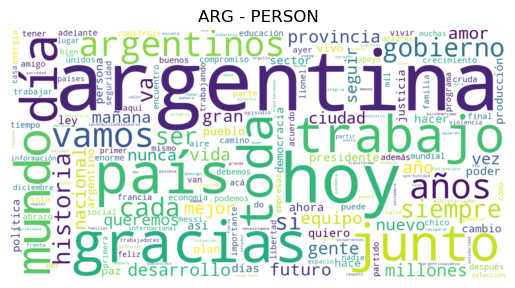

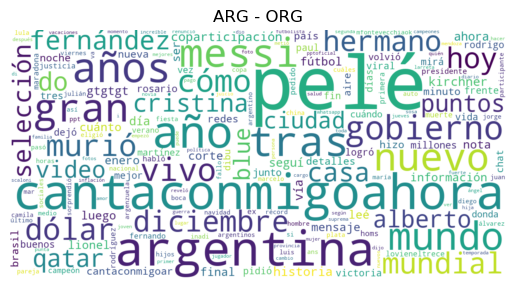

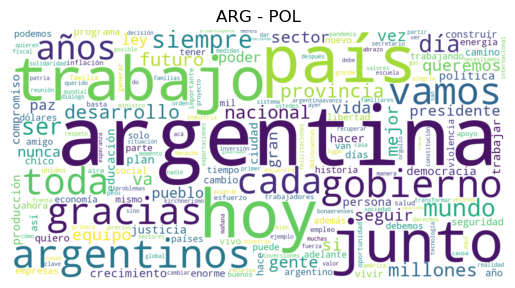

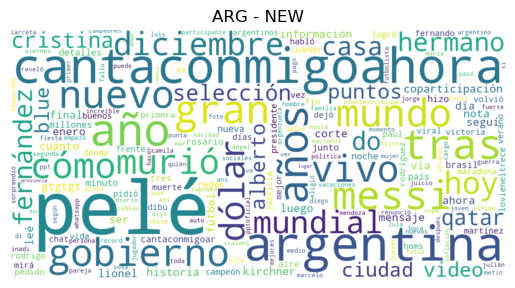

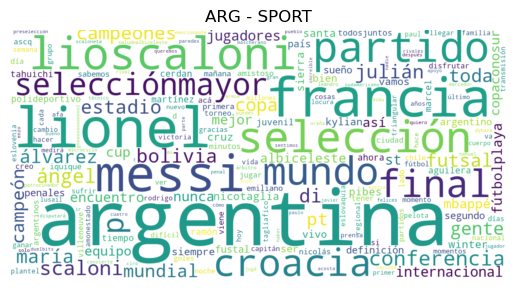

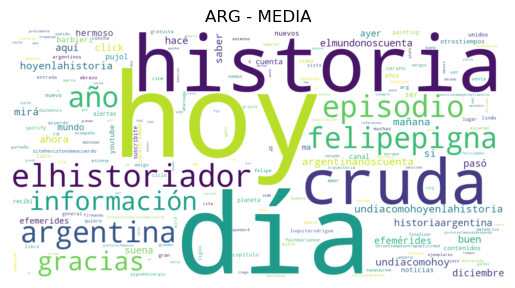

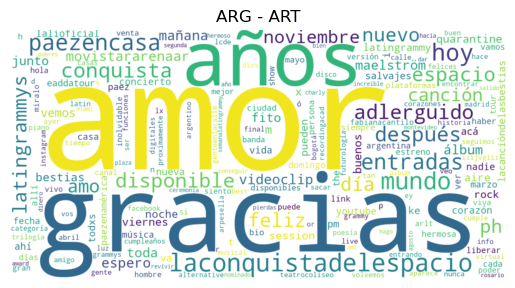

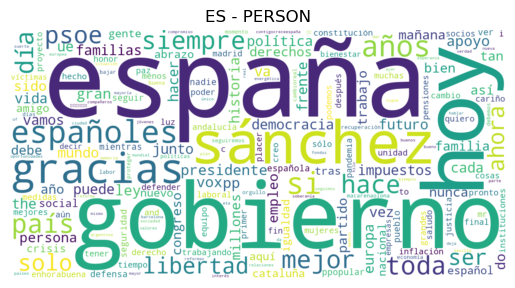

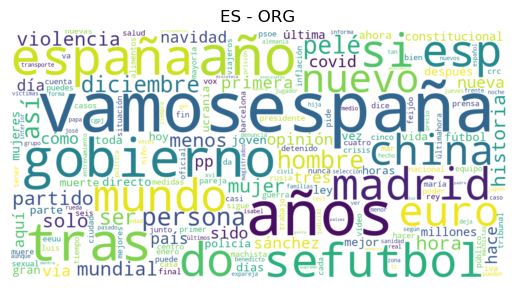

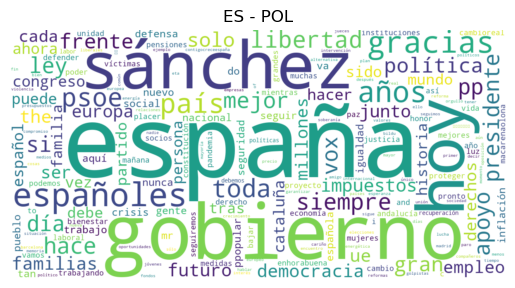

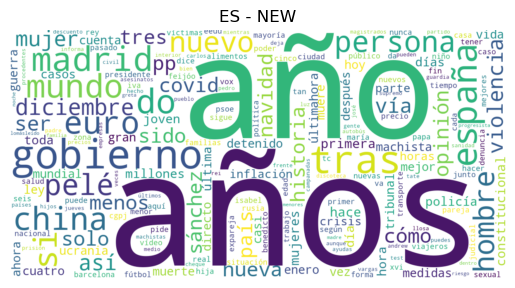

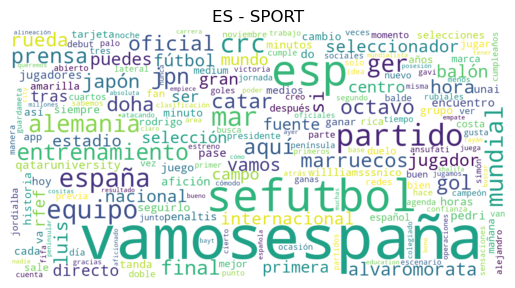

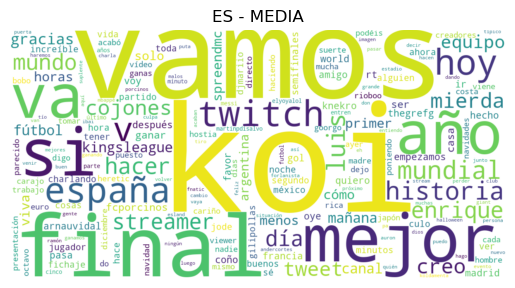

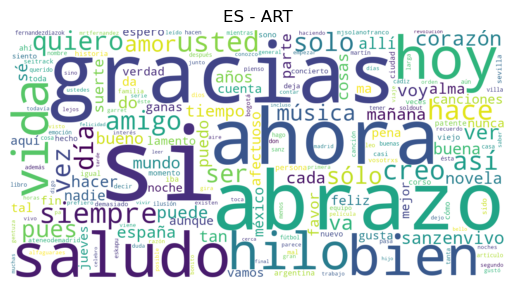

In [22]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Read in the preprocessed tweets
df = pd.read_csv("tweets_preprocessed.csv")

# Loop over each label, domain and background
for label in ['ARG', 'ES']:
    for domain in df['domain'].unique():
        # Filter data by label and domain
        filtered_df = df[(df['label'] == label) & (df['domain'] == domain)]
        
        # Concatenate text values into a single string
        text = ' '.join(filtered_df['text'].tolist())
        
        # Tokenize and preprocess text data
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('spanish')]
        
        # Count frequency of each word
        word_counts = Counter(tokens)
        
        # Generate word cloud
        wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(word_counts)
        
        # Visualize word cloud
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label} - {domain}")
        plt.show()
        
    for background in df['background'].unique():
        # Filter data by label and background
        filtered_df = df[(df['label'] == label) & (df['background'] == background)]
        
        # Concatenate text values into a single string
        text = ' '.join(filtered_df['text'].tolist())
        
        # Tokenize and preprocess text data
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('spanish')]
        
        # Count frequency of each word
        word_counts = Counter(tokens)
        
        # Generate word cloud
        wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(word_counts)
        
        # Visualize word cloud
        plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label} - {background}")
        plt.show()



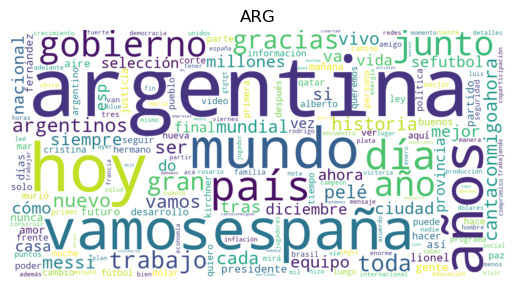

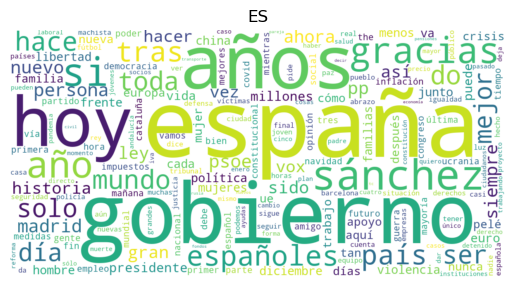

In [5]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read in the preprocessed tweets
df = pd.read_csv("tweets_preprocessed.csv")

# Group by label and concatenate text values into a single string for each group
grouped_df = df.groupby('label')['text'].apply(lambda x: ' '.join(x)).reset_index()

# Loop over each group
for i, row in grouped_df.iterrows():

    # Tokenize and preprocess text data
    tokens = word_tokenize(row['text'].lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('spanish')]

    # Count frequency of each word
    word_counts = Counter(tokens)

    # Generate word cloud
    wordcloud = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(word_counts)

    # Visualize word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(row['label'])
    plt.show()
